In [1]:
# Load required packages
from ramanchada.classes import RamanChada, SpectrumGroup
import pandas as pd
import numpy as np

In [2]:
# Load required files
Path = r'C:\Users\James Thomson\OneDrive - ELoDiz Ltd\Documents\- CHARISMA -\Calibration protocol\Programming test data'
Path = r'D:\nina\src\charisma-raman-spectrum-harmonization\test\calibration'
Neon_file = r'\NEON_GlacX785_BWTek_Probe_P0_850msx5_raw.csv'
Silicon_file = r'\SON12_GlacX785_BWTek_Probe_P100_55sx3.txt'
Calcite_file = r'\sCAL12_GlacX785_BWTek_Probe_P100_25sx5.txt'
Polystyrene_file = r'\PST12_GlacX785_BWTek_Probe_P100_65sx3-final one.txt'

In [3]:
# Turn files to .cha
Neon = RamanChada(Path+Neon_file)
Silicon = RamanChada(Path+Silicon_file)
Calcite = RamanChada(Path+Calcite_file)
Polystyrene = RamanChada(Path+Polystyrene_file)

Importing 1857 data lines starting from line 1 in NEON_GlacX785_BWTek_Probe_P0_850msx5_raw.csv.
Importing 0 metadata lines from NEON_GlacX785_BWTek_Probe_P0_850msx5_raw.csv.



d:\nina\src\charisma-raman-spectrum-harmonization-master\ramanchada\src\ramanchada\file_io\txt_format_readers.py:70: RuntimeWarning: invalid value encountered in true_divide
  score = np.nan_to_num(data.std(0)/data.mean(0), nan=0)


Importing 2048 data lines starting from line 89 in SON12_GlacX785_BWTek_Probe_P100_55sx3.txt.
Found more than 2 data columns in SON12_GlacX785_BWTek_Probe_P100_55sx3.txt.
X data: assigning column labelled 'raman shift'.
Y data: assigning column labelled 'dark subtracted #1'.
Importing 88 metadata lines from SON12_GlacX785_BWTek_Probe_P100_55sx3.txt.

Importing 2048 data lines starting from line 89 in sCAL12_GlacX785_BWTek_Probe_P100_25sx5.txt.
Found more than 2 data columns in sCAL12_GlacX785_BWTek_Probe_P100_25sx5.txt.
X data: assigning column labelled 'raman shift'.
Y data: assigning column labelled 'dark subtracted #1'.
Importing 88 metadata lines from sCAL12_GlacX785_BWTek_Probe_P100_25sx5.txt.

Importing 2048 data lines starting from line 89 in PST12_GlacX785_BWTek_Probe_P100_65sx3-final one.txt.
Found more than 2 data columns in PST12_GlacX785_BWTek_Probe_P100_65sx3-final one.txt.
X data: assigning column labelled 'raman shift'.
Y data: assigning column labelled 'dark subtracted 

In [4]:
# Set neon spectrum to pixel numbers
Neon.reset_x()

In [5]:
# Find peak positions of neon peaks
Neon.peaks(fitmethod='par', interval_width=0.5, show=True, prominence=.002, sort_by='position')
Neon.bands

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

In [6]:
# Make pixel-wavenumber calibration
neon_x_axisWN = Neon.make_x_axis({
    2: 10346.162,
    8: 10668.590,
    16: 10930.551,
    18: 11211.391,
    23: 11388.717,
    29: 11581.245,
    34: 11771.132,
    40: 11936.579,
    43: 12047.728,
    45: 12290.433,
    48: 12589.416}, x_unit='wavenumber [1/cm]', column='par fitted position')
Neon.assign_x(neon_x_axisWN)

1856


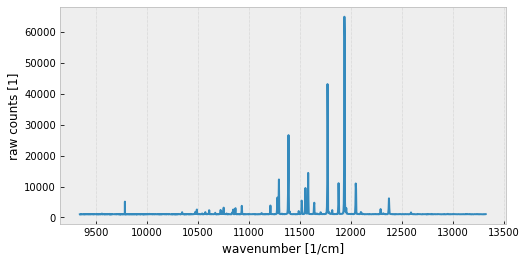

In [7]:
print(len(Neon.y))
Neon.plot()

In [8]:
Neon.peaks(sort_by='position')

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

In [11]:
Neon.x

array([13320.78424792, 13316.49632179, 13312.21212352, ...,
        9345.75254403,  9344.44031746,  9343.1275725 ])

In [19]:
def lims(x, x_min, x_max):
    x_min = np.fmax(x_min, np.fmin(x[0], x[-1]))
    x_max = np.fmin(x_max, np.fmax(x[0], x[-1]))
    y_min, y_max = np.argmin(np.abs(x-x_max)),np.argmin(np.abs(x-x_min))
    #print(np.abs(x-x_min))
    #print(np.abs(x-x_max))
    #print(y_min,y_max)
    def l(Y):
        return Y[...,y_min:y_max+1]
    return l

print(Neon.y)
x_min=-1e9
x_max=1e9,


l = lims(Neon.x, x_min, x_max)
print(l(Neon.x))
print(l(Neon.y))


[1087.  1051.8 1038.8 ... 1086.6 1069.8 1043.4]
[13320.78424792 13316.49632179 13312.21212352 ...  9345.75254403
  9344.44031746  9343.1275725 ]
[1087.  1051.8 1038.8 ... 1086.6 1069.8 1043.4]


In [ ]:
l = lims(self.x, x_min, x_max)
x = l(self.x)
y = l(self.y)

In [10]:
len(Neon.x)

1856

In [ ]:
Neon.peaks(fitmethod='par', interval_width=2.2, show=True, prominence=.002, sort_by='position')
Neon.bands